In [12]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os

In [14]:
import cactas as C

In [4]:
#DATAPATH = '/home/d/Dropbox/RESEARCH/CAROTID/DATA/Nathan Arnett Calcification/'

In [15]:
DATAPATH = '/Users/jiehyun/Jenna/UMassBoston/Research/Nathan_Arnett_Calcification/'

In [16]:
DATASETS = sorted([v for v in os.listdir(DATAPATH) if os.path.isdir(DATAPATH + v)])

images = []
labels = []

for i,d in enumerate(DATASETS):
    
    # ignore DICOM 12 since we have DICOM 12-checked
    if d == 'DICOM 12':
        continue
    
    image, label = C.Util.load(i)
    
    # crop according to all annotations
    image_cropped, label_cropped = C.Util.crop(image, label)
    
    # remove all slices without annotations
    image_filtered, label_filtered = C.Util.filter(image_cropped, label_cropped)
    
    label_binarized = C.Util.binarize(label_filtered)
    
    images.append(image_filtered)
    labels.append(label_binarized)
    

In [17]:
print('Total images/labels:', len(images))

Total images/labels: 35


In [18]:
padded_images, padded_labels = C.Util.pad(images, labels)

In [19]:
padded_images.shape

(552, 212, 83)

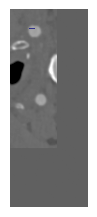

In [20]:
C.Util.view(padded_images[0], padded_labels[0])

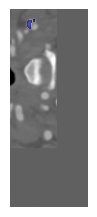

In [21]:
C.Util.view(padded_images[10], padded_labels[10])

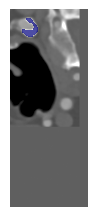

In [22]:
C.Util.view(padded_images[200], padded_labels[200])

In [ ]:
#
# now we can store padded_images and padded_labels as .npy files
#